## Previous Activity

## Practical Activity 6.1.6

### Prepare workstation

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read the data file.
data = pd.read_csv("raw_sales.csv", index_col = ['datesold'], parse_dates = ['datesold'])

# View the DataFrame.
print(data.shape)
data.head()

(29580, 4)


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3


In [2]:
# Simple hacks to make plots look better: 

# # Colour pallete to make charts look better
blue, = sns.color_palette("muted", 1) 

# darkgrid, white grid, dark, white and ticks
sns.set_style('whitegrid') 

# fontsize of the axes title
plt.rc('axes', titlesize=18) 

# fontsize of the x and y labels
plt.rc('axes', labelsize=14)    

# fontsize of the tick labels
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# fontsize of the tick labels
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# legend fontsize
plt.rc('legend', fontsize=13)

# controls default text sizes
plt.rc('font', size=13)       

### Get to know the data

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'House Prices')

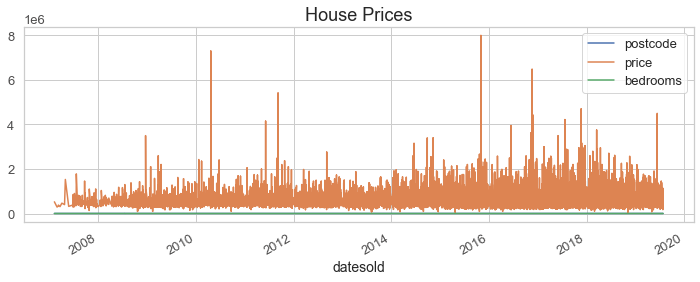

postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [3]:
# Plot the house prices as a time series.
# Plot the size.
data.plot(figsize = (12, 4))

# Specify the legend and title of the plot.
plt.legend(loc = 'best')
plt.title('House Prices')
plt.show(block = False)

# Check for missing values.
data.isnull().sum()

### Checking the dataset for the count of houses based on their bedrooms

3    11933
4    10442
2     3598
5     1950
1     1627
0       30
Name: bedrooms, dtype: int64


Text(0.5, 1.0, 'Count the number of bedrooms')

<AxesSubplot:title={'center':'Count the number of bedrooms'}, xlabel='bedrooms', ylabel='count'>

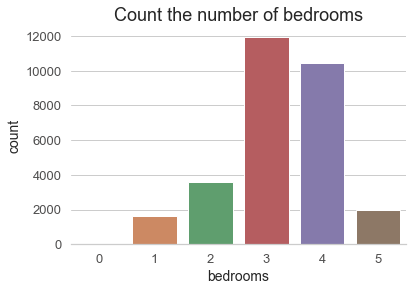

In [4]:
# Count the number of values in a specified column in the DataFrame.
print(data['bedrooms'].value_counts())

# Create a plot.
plt.title('Count the number of bedrooms')

sns.despine(left = True)
sns.countplot(x = 'bedrooms', data = data)

### Define sub-data sets

In [5]:
# Create a copy of the original data for convinience.
data_sub = data.copy()


# Data set cosnsisting of houses with 1 bedroom: 
df_1 = data_sub[data_sub['bedrooms'] == 1]
print(df_1.shape)


# Data set cosnsisting of houses with 2 bedrooms: 
df_2 = data_sub[data_sub['bedrooms'] == 2]
print(df_2.shape)


# Data set cosnsisting of houses with 3 bedrooms: 
df_3 = data_sub[data_sub['bedrooms'] == 3]
print(df_3.shape)


# Data set cosnsisting of houses with 4 bedrooms: 
df_4 = data_sub[data_sub['bedrooms'] == 4]
print(df_4.shape)


# Data set cosnsisting of houses with 5 bedrooms: 
df_5 = data_sub[data_sub['bedrooms'] == 5]
print(df_5.shape)

(1627, 4)
(3598, 4)
(11933, 4)
(10442, 4)
(1950, 4)


### Detect outliers

(array([613., 982.,  27.,   2.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([  85000.,  304500.,  524000.,  743500.,  963000., 1182500.,
        1402000., 1621500., 1841000., 2060500., 2280000.]),
 <BarContainer object of 10 artists>)

(array([1.526e+03, 1.846e+03, 1.950e+02, 2.300e+01, 6.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  96000.,  391400.,  686800.,  982200., 1277600., 1573000.,
        1868400., 2163800., 2459200., 2754600., 3050000.]),
 <BarContainer object of 10 artists>)

(array([1.0209e+04, 1.6280e+03, 8.4000e+01, 8.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  69000.,  710100., 1351200., 1992300., 2633400., 3274500.,
        3915600., 4556700., 5197800., 5838900., 6480000.]),
 <BarContainer object of 10 artists>)

(array([8.528e+03, 1.767e+03, 1.260e+02, 1.600e+01, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  56500.,  850850., 1645200., 2439550., 3233900., 4028250.,
        4822600., 5616950., 6411300., 7205650., 8000000.]),
 <BarContainer object of 10 artists>)

(array([1.289e+03, 5.590e+02, 7.400e+01, 1.700e+01, 7.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 210000.,  919000., 1628000., 2337000., 3046000., 3755000.,
        4464000., 5173000., 5882000., 6591000., 7300000.]),
 <BarContainer object of 10 artists>)

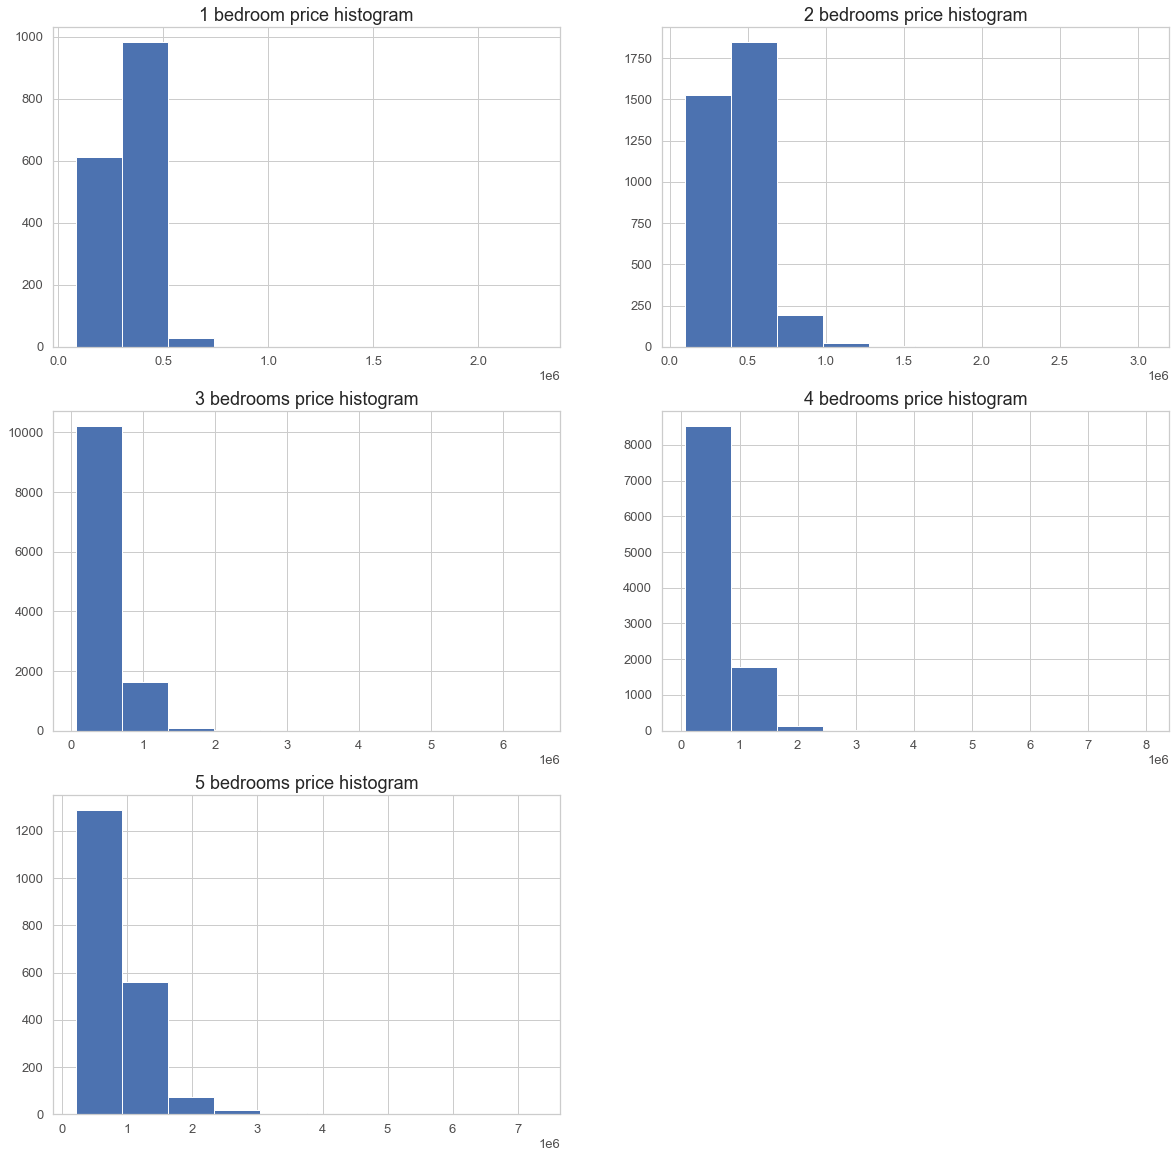

In [6]:
# Set the plot size.
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))

# 1 bedroom:
axes[0][0].hist(df_1['price'])
axes[0][0].title.set_text('1 bedroom price histogram')

# 2 bedrooms:
axes[0][1].hist(df_2['price'])
axes[0][1].title.set_text('2 bedrooms price histogram')

# 3 bedrooms:
axes[1][0].hist(df_3['price'])
axes[1][0].title.set_text('3 bedrooms price histogram')

# 4 bedrooms:
axes[1][1].hist(df_4['price'])
axes[1][1].title.set_text('4 bedrooms price histogram')

# 5 bedrooms:
axes[2][0].hist(df_5['price'])
axes[2][0].title.set_text('5 bedrooms price histogram')

fig.delaxes(axes[2][1])

plt.show()

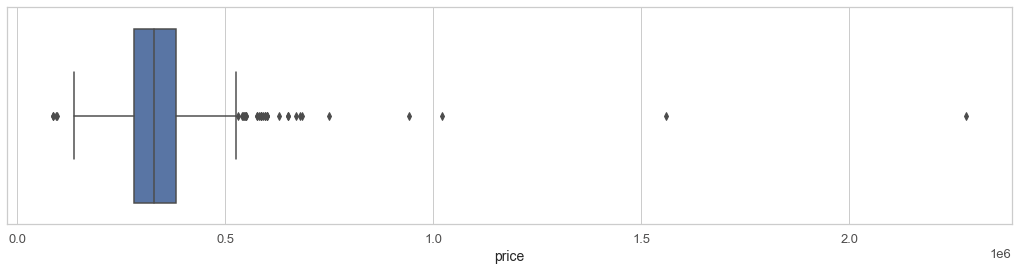

In [7]:
# Create a boxplot for 1 bedroom.
# Set figure size.
fig = plt.figure(figsize = (18, 4))

# Create a boxplot.
ax = sns.boxplot(x = df_1['price'], whis = 1.5)

### Remove outliers

In [8]:
# Remove outliers for houses with 1 bedroom.
# The columns you want to search for outiers in.
cols = ['price']

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0, 1) and not (0, 100)
Q1 = df_1[cols].quantile(0.25)
Q3 = df_1[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((df_1[cols] < (Q1 - 1.5 * IQR)) | (df_1[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)

# Filter our DataFrame based on condition.
df_1_non_outlier = df_1[condition]
df_1_non_outlier.shape

price    100250.0
dtype: float64

(1592, 4)

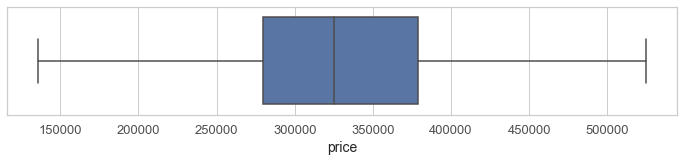

In [9]:
# Plot to see if outliers have been removed:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_1_non_outlier['price'], whis = 1.5)

### Dataset with 2 bedroom (df_2)

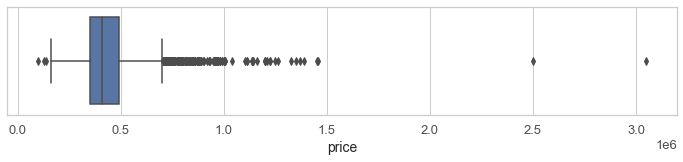

In [10]:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_2['price'], whis = 1.5)

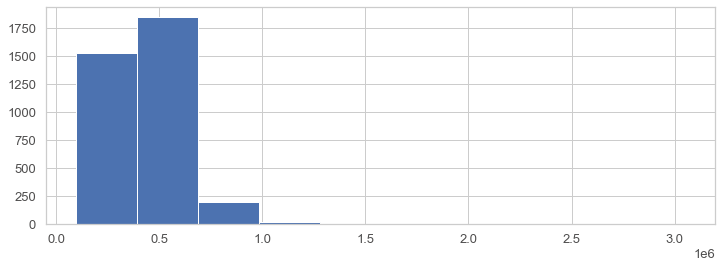

In [11]:
# Histogram plot
fig = df_2.price.hist(figsize = (12,4))

In [12]:
# Remove outliers for houses with 2 bedrooms.
# The columns you want to search for outiers in.
cols = ['price']

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0, 1) and not (0, 100)
Q1 = df_2[cols].quantile(0.25)
Q3 = df_2[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((df_2[cols] < (Q1 - 1.5 * IQR)) | (df_2[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)

# Filter our DataFrame based on condition.
df_2_non_outlier = df_2[condition]
df_2_non_outlier.shape

price    140000.0
dtype: float64

(3387, 4)

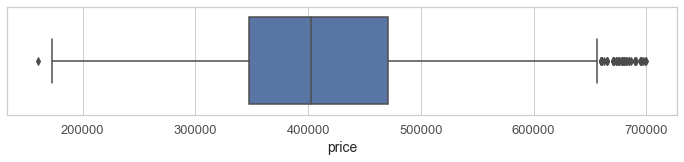

In [13]:
# Plot to see if outliers have been removed:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_2_non_outlier['price'], whis = 1.5)

### Dataset with 3 bedroom (df_3)

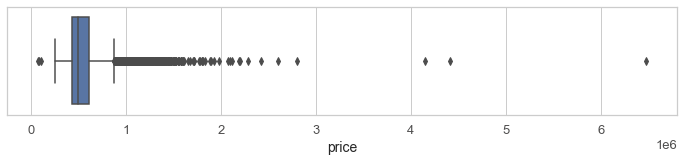

In [14]:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_3['price'], whis = 1.5)

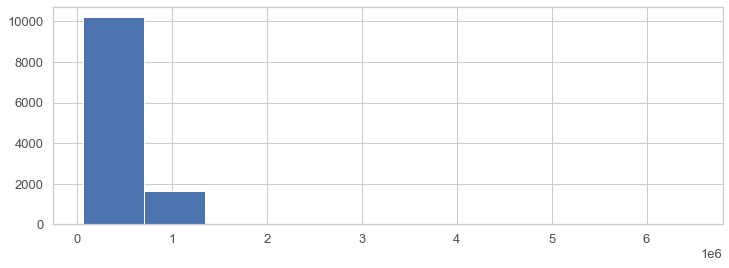

In [15]:
# Histogram plot
fig = df_3.price.hist(figsize = (12,4))

In [16]:
# Remove outliers for houses with 3 bedrooms.
# The columns you want to search for outiers in.
cols = ['price']

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0, 1) and not (0, 100)
Q1 = df_3[cols].quantile(0.25)
Q3 = df_3[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((df_3[cols] < (Q1 - 1.5 * IQR)) | (df_3[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)

# Filter our DataFrame based on condition.
df_3_non_outlier = df_3[condition]
df_3_non_outlier.shape

price    177500.0
dtype: float64

(11254, 4)

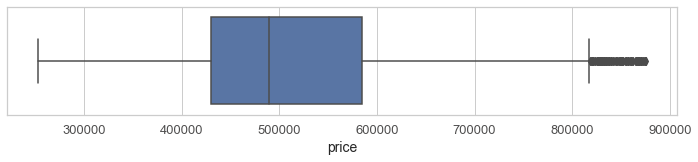

In [17]:
# Plot to see if outliers have been removed:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_3_non_outlier['price'], whis = 1.5)

### Dataset with 4 bedroom (df_4)

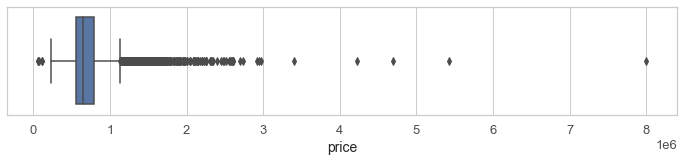

In [18]:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_4['price'], whis = 1.5)

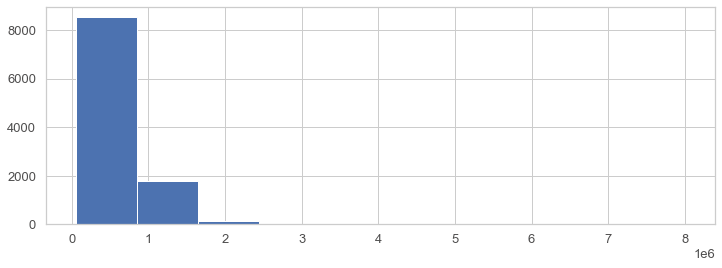

In [19]:
# Histogram plot
fig = df_4.price.hist(figsize = (12,4))

In [20]:
# Remove outliers for houses with 4 bedrooms.
# The columns you want to search for outiers in.
cols = ['price']

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0, 1) and not (0, 100)
Q1 = df_4[cols].quantile(0.25)
Q3 = df_4[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((df_4[cols] < (Q1 - 1.5 * IQR)) | (df_4[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)

# Filter our DataFrame based on condition.
df_4_non_outlier = df_4[condition]
df_4_non_outlier.shape

price    230500.0
dtype: float64

(9772, 4)

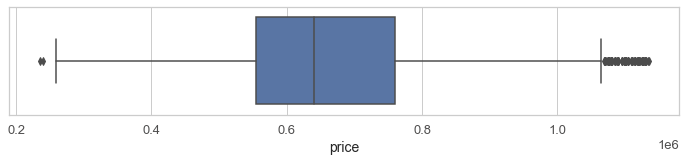

In [21]:
# Plot to see if outliers have been removed:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_4_non_outlier['price'], whis = 1.5)

### Dataset with 5 bedroom (df_5)

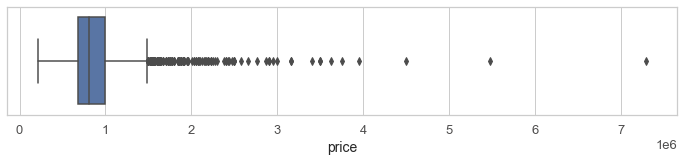

In [22]:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_5['price'], whis = 1.5)

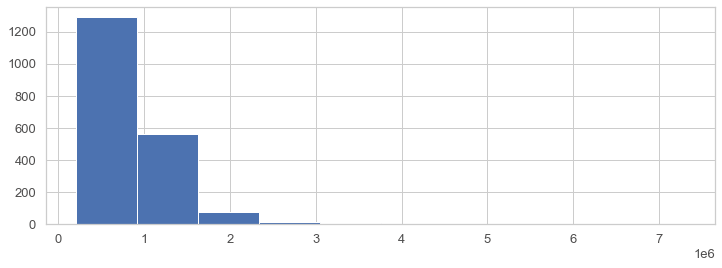

In [23]:
# Histogram plot
fig = df_5.price.hist(figsize = (12,4))

In [24]:
# Remove outliers for houses with 5 bedrooms.
# The columns you want to search for outiers in.
cols = ['price']

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0, 1) and not (0, 100)
Q1 = df_5[cols].quantile(0.25)
Q3 = df_5[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((df_5[cols] < (Q1 - 1.5 * IQR)) | (df_5[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)

# Filter our DataFrame based on condition.
df_5_non_outlier = df_5[condition]
df_5_non_outlier.shape

price    325000.0
dtype: float64

(1809, 4)

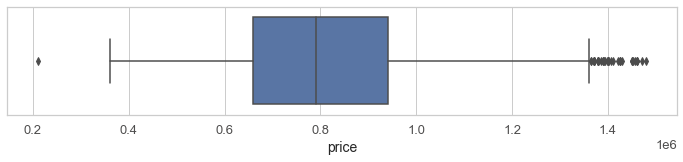

In [25]:
# Plot to see if outliers have been removed:
# whis = multiplicative factor.
fig = plt.subplots(figsize = (12, 2))

ax = sns.boxplot(x = df_5_non_outlier['price'], whis = 1.5)

## New Activity Starts Here

## Practical Activity 6.1.8

### Plot the sub-data sets

135500

525000

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time series plot for house with 1 bedroom')

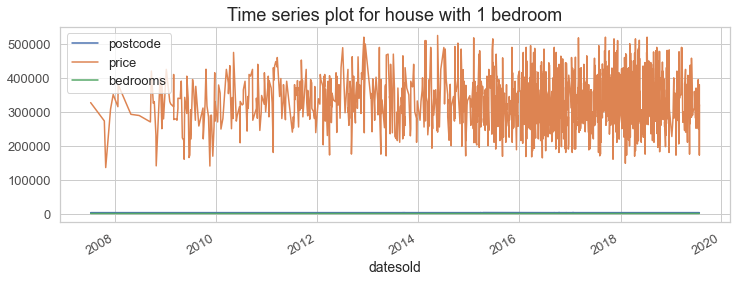

In [31]:
# Create a plot for 1 bedroom.
# Calculate max and min.
df_1_non_outlier['price'].min()
df_1_non_outlier['price'].max()

# Plot the time-series data.
df_1_non_outlier.plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Time series plot for house with 1 bedroom')
plt.show(block = False)

160000

700000

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time series plot for house with 2 bedrooms')

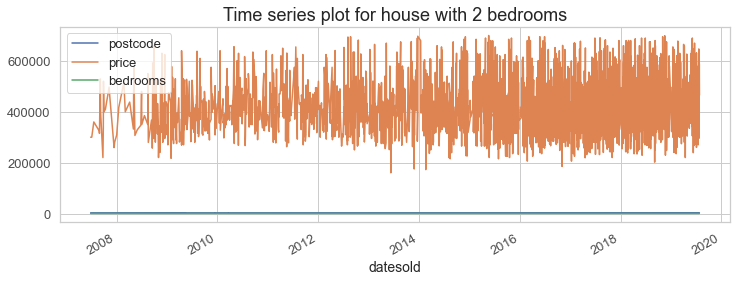

In [32]:
# Create a plot for 2 bedrooms.
# Calculate max and min.
df_2_non_outlier['price'].min()
df_2_non_outlier['price'].max()

# Plot the time-series data.
df_2_non_outlier.plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Time series plot for house with 2 bedrooms')
plt.show(block = False)

252500

876000

<AxesSubplot:xlabel='datesold'>

<function matplotlib.pyplot.legend(*args, **kwargs)>

Text(0.5, 1.0, 'Time series plot for house with 3 bedroom')

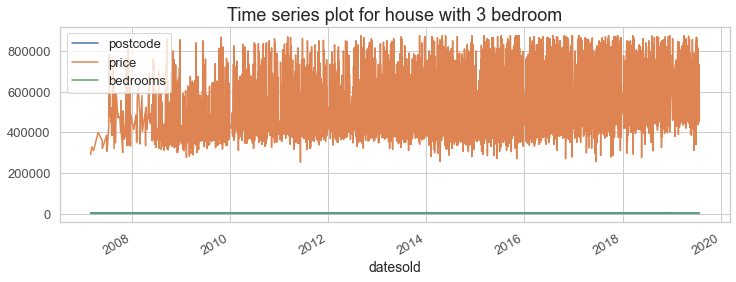

In [33]:
# Create a plot for 3 bedrooms.
# Calculate max and min.
df_3_non_outlier['price'].min()
df_3_non_outlier['price'].max()

# Plot the time-series data.
df_3_non_outlier.plot(figsize = (12, 4))
plt.legend
plt.title('Time series plot for house with 3 bedroom')
plt.show(block = False)

235000

1135001

<AxesSubplot:xlabel='datesold'>

<function matplotlib.pyplot.legend(*args, **kwargs)>

Text(0.5, 1.0, 'Time series plot for house with 4 bedroom')

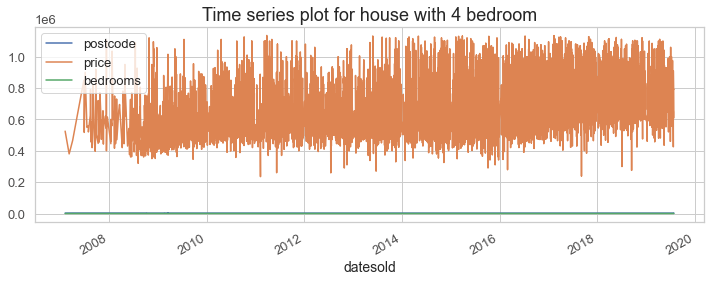

In [34]:
# Create a plot for 4 bedrooms.
# Calculate max and min.
df_4_non_outlier['price'].min()
df_4_non_outlier['price'].max()

# Plot the time-series data.
df_4_non_outlier.plot(figsize = (12, 4))
plt.legend
plt.title('Time series plot for house with 4 bedroom')
plt.show(block = False)

210000

1480000

<AxesSubplot:xlabel='datesold'>

<function matplotlib.pyplot.legend(*args, **kwargs)>

Text(0.5, 1.0, 'Time series plot for house with 5 bedroom')

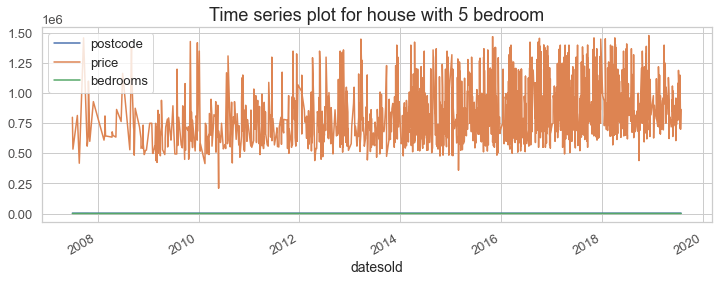

In [35]:
# Create a plot for 5 bedrooms.
# Calculate max and min.
df_5_non_outlier['price'].min()
df_5_non_outlier['price'].max()

# Plot the time-series data.
df_5_non_outlier.plot(figsize = (12, 4))
plt.legend
plt.title('Time series plot for house with 5 bedroom')
plt.show(block = False)

### Resample the sub-data sets to remove noise

,postcode,price,bedrooms
datesold,,,
2007-07-31,2600.0,327000.0,1.0
2007-08-31,NaN,NaN,NaN
2007-09-30,NaN,NaN,NaN
2007-10-31,2608.5,204250.0,1.0
2007-11-30,2912.0,308000.0,1.0


postcode    0
price       0
bedrooms    0
dtype: int64

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time series plot for house with 1 bedroom after resampling')

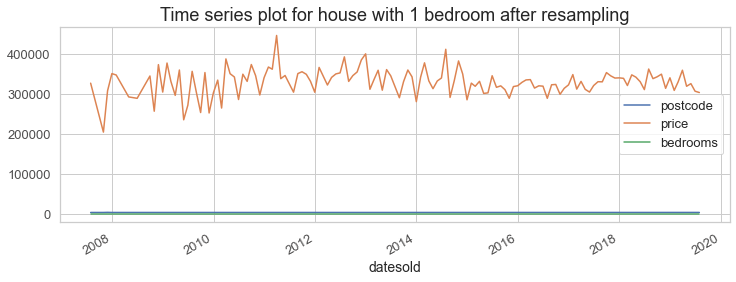

In [36]:
# Resample the data set with 1 bedroom.
df_1_res = df_1_non_outlier.resample('M').mean()
df_1_res.head()

# Drop the missing values:
df_1_res.dropna(inplace = True)
df_1_res.isna().sum()

# Plot the time-series data:
df_1_res.plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Time series plot for house with 1 bedroom after resampling')
plt.show(block = False)

,postcode,price,bedrooms
datesold,,,
2007-06-30,2606.0,300000.0,2.0
2007-07-31,2607.5,330000.0,2.0
2007-08-31,2905.5,320000.0,2.0
2007-09-30,2609.6,401800.0,2.0
2007-10-31,2612.0,405000.0,2.0


postcode    0
price       0
bedrooms    0
dtype: int64

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time series plot for house with 2 bedrooms after resampling')

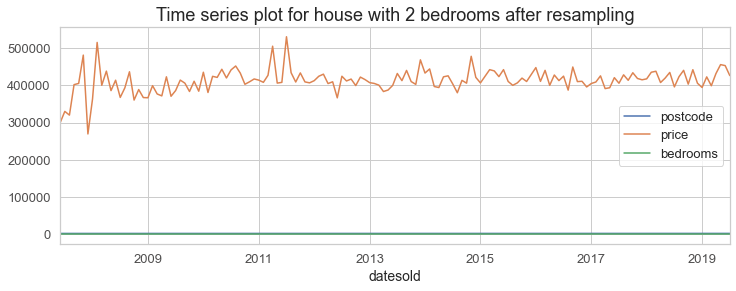

In [37]:
# Resample the data set with 2 bedrooms.
df_2_res = df_2_non_outlier.resample('M').mean()
df_2_res.head()

# Drop the missing values:
df_2_res.dropna(inplace = True)
df_2_res.isna().sum()

# Plot the time-series data:
df_2_res.plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Time series plot for house with 2 bedrooms after resampling')
plt.show(block = False)

,postcode,price,bedrooms
datesold,,,
2007-02-28,2906.0,290000.0,3.0
2007-03-31,2905.5,319000.0,3.0
2007-04-30,2607.0,399000.0,3.0
2007-05-31,2904.0,339500.0,3.0
2007-06-30,2904.0,345000.0,3.0


postcode    0
price       0
bedrooms    0
dtype: int64

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time series plot for house with 3 bedrooms after resampling')

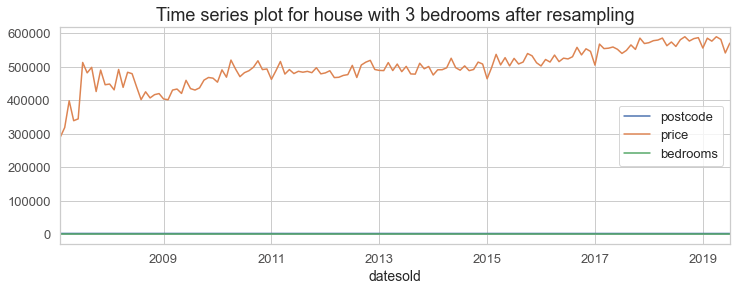

In [38]:
# Resample the data set with 3 bedrooms.
df_3_res = df_3_non_outlier.resample('M').mean()
df_3_res.head()

# Drop the missing values:
df_3_res.dropna(inplace = True)
df_3_res.isna().sum()

# Plot the time-series data:
df_3_res.plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Time series plot for house with 3 bedrooms after resampling')
plt.show(block = False)

,postcode,price,bedrooms
datesold,,,
2007-02-28,2607.000000,525000.000000,4.0
2007-03-31,2905.000000,380000.000000,4.0
2007-04-30,2905.000000,465000.000000,4.0
2007-05-31,NaN,NaN,NaN
2007-06-30,2710.333333,710666.666667,4.0


postcode    0
price       0
bedrooms    0
dtype: int64

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time series plot for house with 4 bedrooms after resampling')

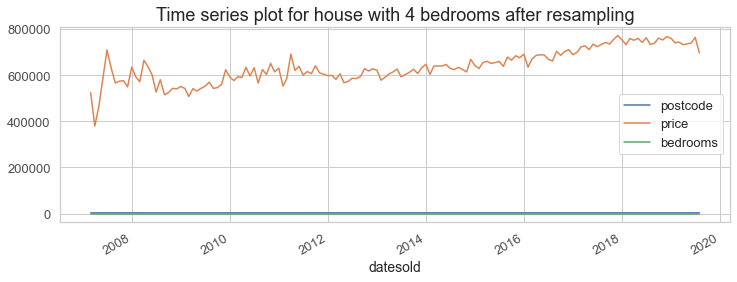

In [39]:
# Resample the data set with 4 bedrooms.
df_4_res = df_4_non_outlier.resample('M').mean()
df_4_res.head()

# Drop the missing values:
df_4_res.dropna(inplace = True)
df_4_res.isna().sum()

# Plot the time-series data:
df_4_res.plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Time series plot for house with 4 bedrooms after resampling')
plt.show(block = False)

,postcode,price,bedrooms
datesold,,,
2007-07-31,2764.500000,6.675000e+05,5.0
2007-08-31,2903.000000,6.165000e+05,5.0
2007-09-30,2603.000000,1.460000e+06,5.0
2007-10-31,2811.333333,7.683333e+05,5.0
2007-11-30,2611.000000,6.000000e+05,5.0


postcode    0
price       0
bedrooms    0
dtype: int64

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time series plot for house with 5 bedrooms after resampling')

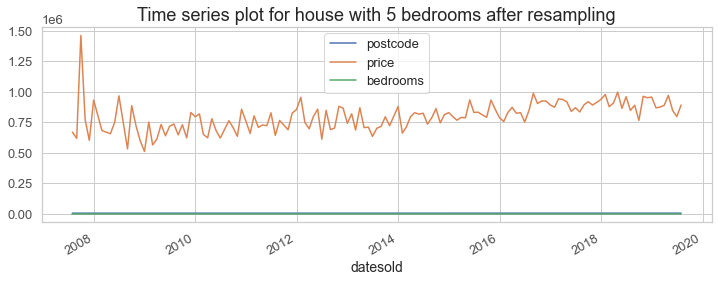

In [40]:
# Resample the data set with 5 bedrooms.
df_5_res = df_5_non_outlier.resample('M').mean()
df_5_res.head()

# Drop the missing values:
df_5_res.dropna(inplace = True)
df_5_res.isna().sum()

# Plot the time-series data:
df_5_res.plot(figsize = (12, 4))
plt.legend(loc = 'best')
plt.title('Time series plot for house with 5 bedrooms after resampling')
plt.show(block = False)

### Calculate and plot the simple moving average

In [41]:
# Function to calculate and plot the simple moving average:
def plot_moving_average(series, window, plot_intervals = False, scale = 1.96):
    
    rolling_mean = series.rolling(window = window).mean()
    
    plt.figure(figsize = (12, 4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label = 'Simple moving average trend')
    
    # Plot confidence intervals for smoothed values.
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label = 'Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
        
    plt.plot(series[window:], label = 'Actual values')
    plt.legend(loc = 'best')
    plt.grid(True)

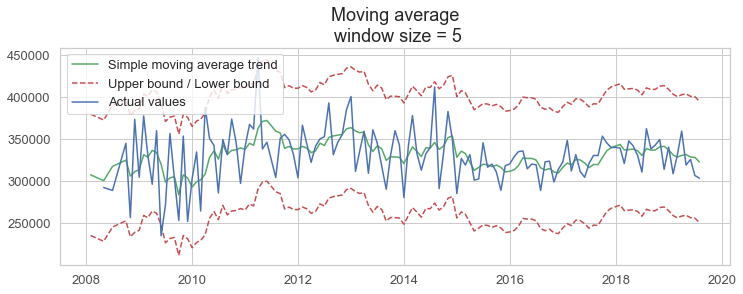

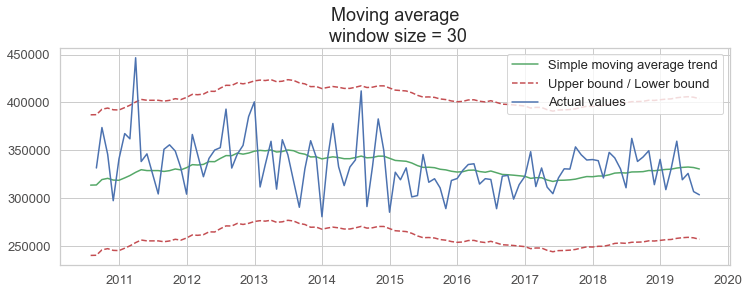

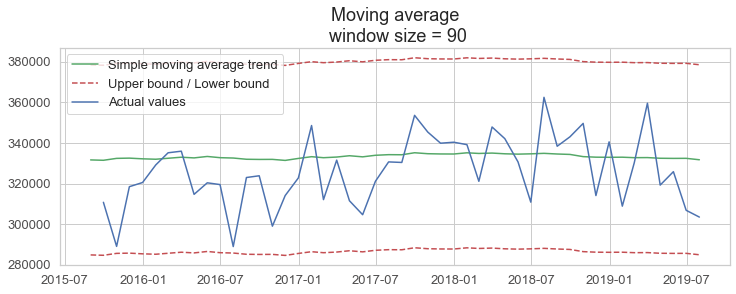

In [42]:
# 1 bedroom
# 5 days
plot_moving_average(df_1_res.price, 5, plot_intervals=True)

# 30-days smoothing
plot_moving_average(df_1_res.price, 30, plot_intervals=True)

# 90-days smoothing
plot_moving_average(df_1_res.price, 90, plot_intervals=True)

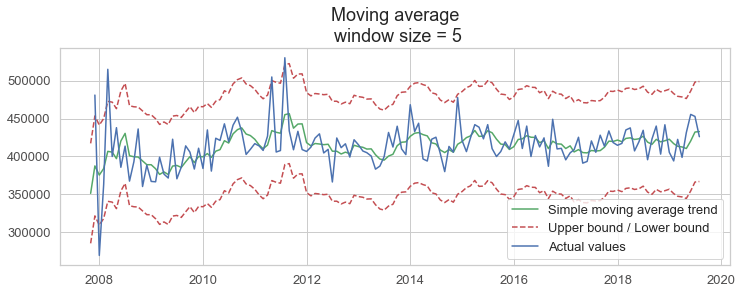

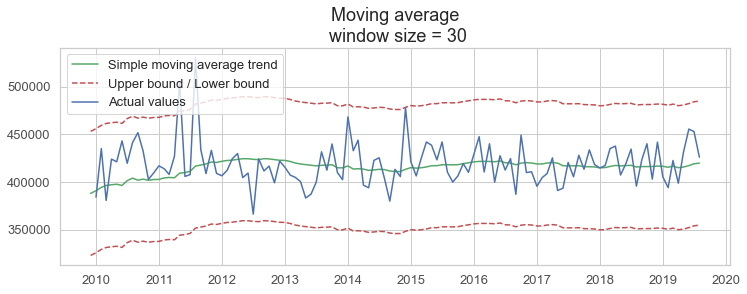

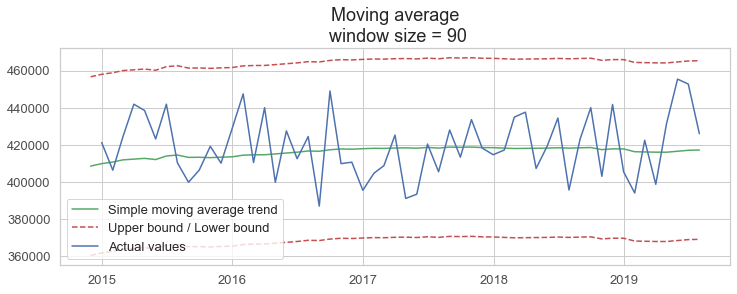

In [43]:
# 2 bedrooms
# 5 days
plot_moving_average(df_2_res.price, 5, plot_intervals=True)

# 30-days smoothing
plot_moving_average(df_2_res.price, 30, plot_intervals=True)

# 90-days smoothing
plot_moving_average(df_2_res.price, 90, plot_intervals=True)

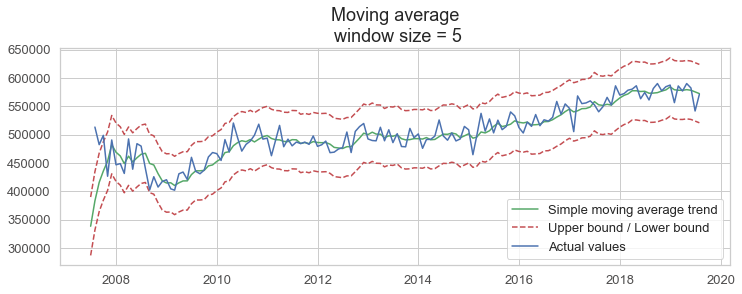

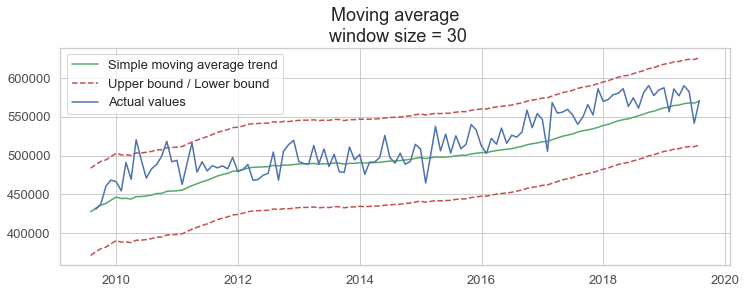

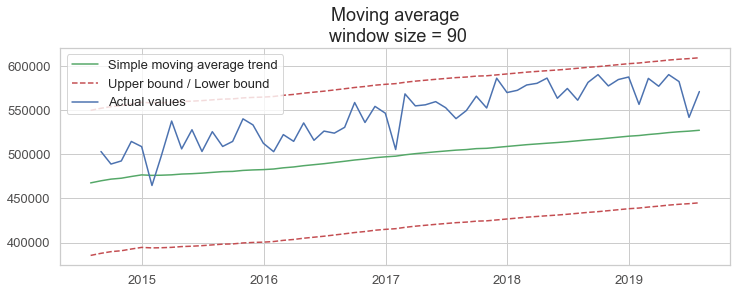

In [44]:
# 3 bedrooms
# 5 days
plot_moving_average(df_3_res.price, 5, plot_intervals=True)

# 30-days smoothing
plot_moving_average(df_3_res.price, 30, plot_intervals=True)

# 90-days smoothing
plot_moving_average(df_3_res.price, 90, plot_intervals=True)

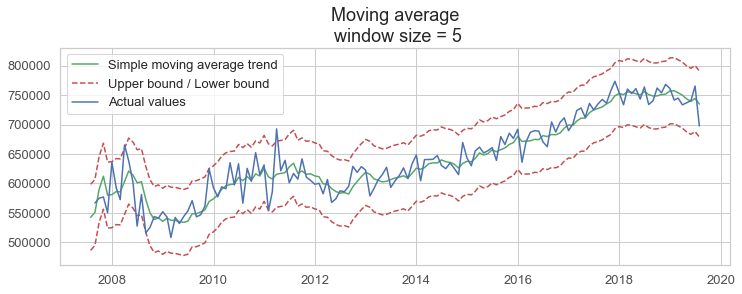

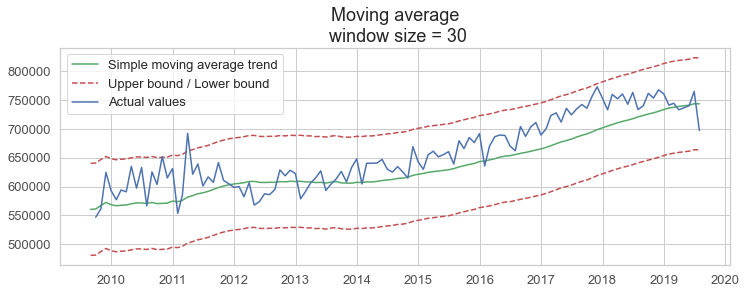

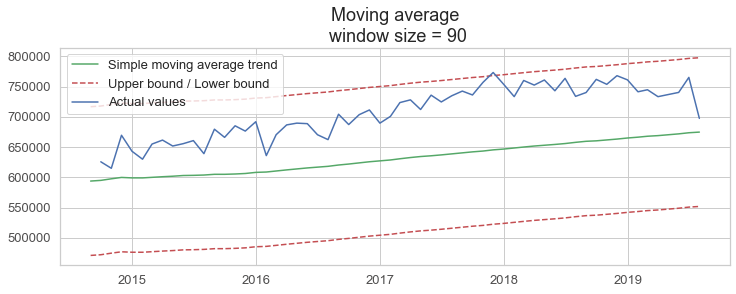

In [45]:
# 4 bedrooms
# 5 days
plot_moving_average(df_4_res.price, 5, plot_intervals=True)

# 30-days smoothing
plot_moving_average(df_4_res.price, 30, plot_intervals=True)

# 90-days smoothing
plot_moving_average(df_4_res.price, 90, plot_intervals=True)

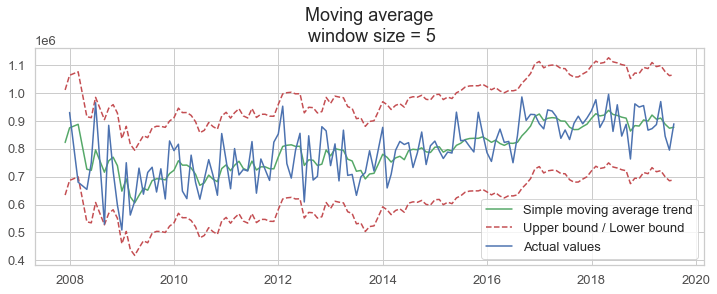

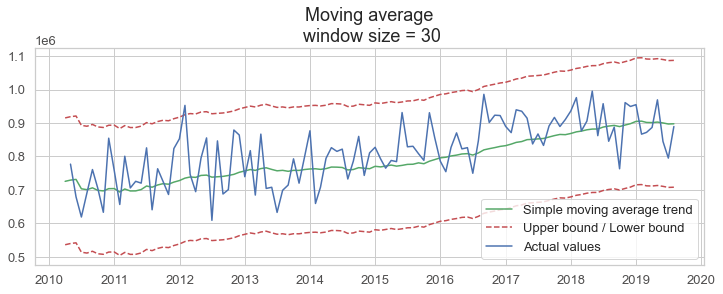

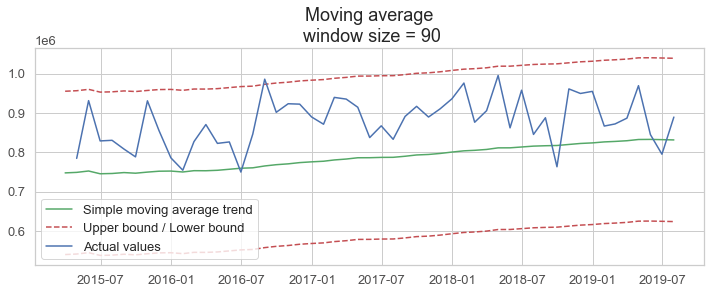

In [46]:
# 5 bedrooms
# 5 days
plot_moving_average(df_5_res.price, 5, plot_intervals=True)

# 30-days smoothing
plot_moving_average(df_5_res.price, 30, plot_intervals=True)

# 90-days smoothing
plot_moving_average(df_5_res.price, 90, plot_intervals=True)